In [3]:
from utility_data import *

dataset = AudioDataset(
    datafolder="data",
    metadata_csv="train_proc_yamn.csv",
    audio_dir="train_proc",
    feature_mode='mel',
    m=1
)

In [4]:
df = dataset.data
dataset.data.shape

(216265, 20)

In [5]:
identified = df['yamnet'].unique()
print(df['yamnet'].value_counts().to_string())

yamnet
Animal                                      115169
Silence                                      27528
Outside, rural or natural                    12563
Wild animals                                  9367
Speech                                        7049
Environmental noise                           6737
Insect                                        5529
Cricket                                       4420
Bird                                          4394
Vehicle                                       3199
Water                                         1962
Bird vocalization, bird call, bird song       1488
White noise                                   1060
Frog                                          1056
Snake                                         1055
Inside, small room                            1021
Pink noise                                     915
Whistling                                      855
Music                                          747
Noise                   

In [ ]:
selection = ['Animal', 
            'Wild animals', 
            'Insect', 
            'Cricket',
            'Bird', 
            'Bird vocalization, bird call, bird song', 
            'Frog', 'Snake', 
            'Whistling', 
            'Owl', 
            'Crow', 
            'Rodents, rats, mice', 
            'Livestock, farm animals, working animals', 
            'Pig', 
            'Squeak', 
            'Domestic animals, pets', 
            'Dog', 
            'Turkey', 
            'Bee, wasp, etc.', 
            'Duck', 
            'Chicken, rooster', 
            'Horse', 
            'Goose', 
            'Squawk', 
            'Chirp tone', 
            'Sheep', 
            'Pigeon, dove']

print('Miswritten: ', [s for s in selection if s not in identified], '\n')
assert set().issubset(identified)

leftover = set(identified) - set(selection)
counts = df['yamnet'].value_counts()
leftover_counts = counts[counts.index.isin(leftover)]
print(leftover_counts.to_string())

Miswritten:  []
yamnet
Silence                            27528
Outside, rural or natural          12563
Speech                              7049
Environmental noise                 6737
Vehicle                             3199
Water                               1962
White noise                         1060
Inside, small room                  1021
Pink noise                           915
Music                                747
Noise                                642
Stream                               625
Rustle                               554
Spray                                494
Hiss                                 483
Wind                                 461
Whistle                              385
Rail transport                       312
Alarm                                298
Rain                                 230
Aircraft                             216
Breathing                            198
Liquid                               173
Radio                             

In [7]:
restricted = df[df['yamnet'].apply(lambda x : x in selection)]
restricted['primary_label'].nunique()

199

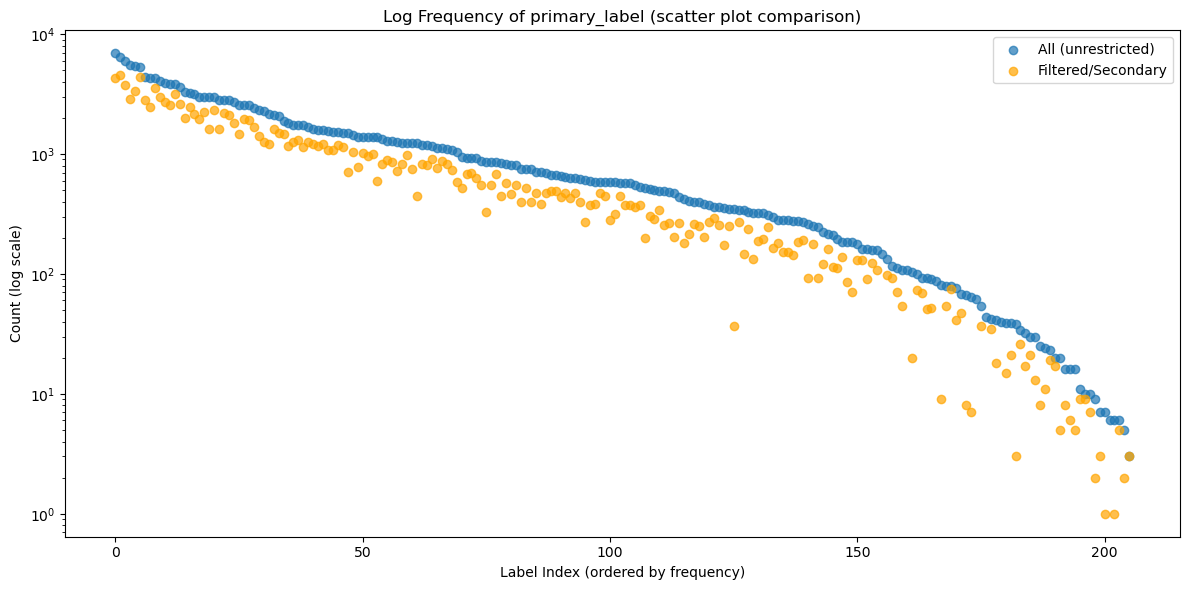

In [9]:
import matplotlib.pyplot as plt

counts_primary = df["primary_label"].value_counts().sort_values(ascending=False)

# For illustration, let's say the second set is secondary label frequency or filtered subset
# Replace this with your actual second data series
# For example, all labels in a restricted subset or second_label column if available
# Here, assume we're comparing to the same dataset but with a condition (e.g., some filter)
counts_secondary = restricted["primary_label"].value_counts()

# Align both series to same x-axis
all_labels = counts_primary.index
y1 = counts_primary.values
y2 = [counts_secondary.get(label, 0) for label in all_labels]  # 0 if label not in second set

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(all_labels)), y1, label='All (unrestricted)', alpha=0.7)
plt.scatter(range(len(all_labels)), y2, label='Filtered/Secondary', alpha=0.7, color='orange')
plt.yscale('log')
plt.title('Log Frequency of primary_label (scatter plot comparison)')
plt.xlabel('Label Index (ordered by frequency)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.tight_layout()
plt.show()